# CASE STUDY
    Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features.

# Data Cleaning & Preprocessing:
    Handle missing values appropriately.
    Encode categorical variables.
    Normalize/standardize numerical features if necessary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv('vehicles.csv')

In [ ]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [ ]:
df.shape

(258888, 26)

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [ ]:
df.dropna(subset=['ad_description','timestamp','posted_date','deactivation_date'],inplace=True)

In [ ]:
df.isnull().sum()

ad_title                     0
ad_description               0
details                 103382
slug                         0
title                        0
type                         0
price                     3811
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9049
is_authorized_dealer      9049
is_featured_member        9049
is_verified                  0
membership_level             0
member_since            150243
properties                   0
user                         0
dtype: int64

In [ ]:
df.dropna(subset=['ad_description','timestamp','posted_date','deactivation_date'],inplace=True)

In [ ]:
df.isnull().sum()

ad_title                     0
ad_description               0
details                 103382
slug                         0
title                        0
type                         0
price                     3811
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9049
is_authorized_dealer      9049
is_featured_member        9049
is_verified                  0
membership_level             0
member_since            150243
properties                   0
user                         0
dtype: int64

In [ ]:
df=df.drop('details',axis=1)

In [ ]:
df=df.drop('member_since',axis=1)

In [ ]:
df.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

## changing the price of the column

In [ ]:
df['price'] = pd.to_numeric(df['price'].str.replace('Rs', '').str.replace(',', ''), errors='coerce')

In [ ]:
df['price'].fillna(df['price'].median(), inplace=True)

C:\Users\gajja\AppData\Local\Temp\ipykernel_9860\1576110267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [ ]:
df.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                      0
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [ ]:
categorical_features = ['type', 'category','is_verified','location', 'geo_region', 'membership_level', 'is_member', 'is_authorized_dealer', 'is_featured_member']
label_encoders = {col: LabelEncoder() for col in categorical_features}

In [ ]:
for col in categorical_features:
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df[['is_member','is_authorized_dealer','is_featured_member']] = imputer.fit_transform(df[['is_member','is_authorized_dealer','is_featured_member']])

In [ ]:
label =LabelEncoder()
for column in ['type','location','geo_region','area','is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_member','is_authorized_dealer','is_featured_member','is_verified','membership_level']:
    df[column]= label.fit_transform(df[column])

In [ ]:
numerical_features = ['price']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.drop(columns=['ad_title','posted_date','parent_category','is_delivery_free','deactivation_date','is_doorstep_delivery','is_doorstep_delivery','ad_description','is_dsd_applicable','slug', 'title', 'timestamp', 'area', 'properties', 'user'], inplace=True)

In [ ]:
df.shape

(258875, 10)

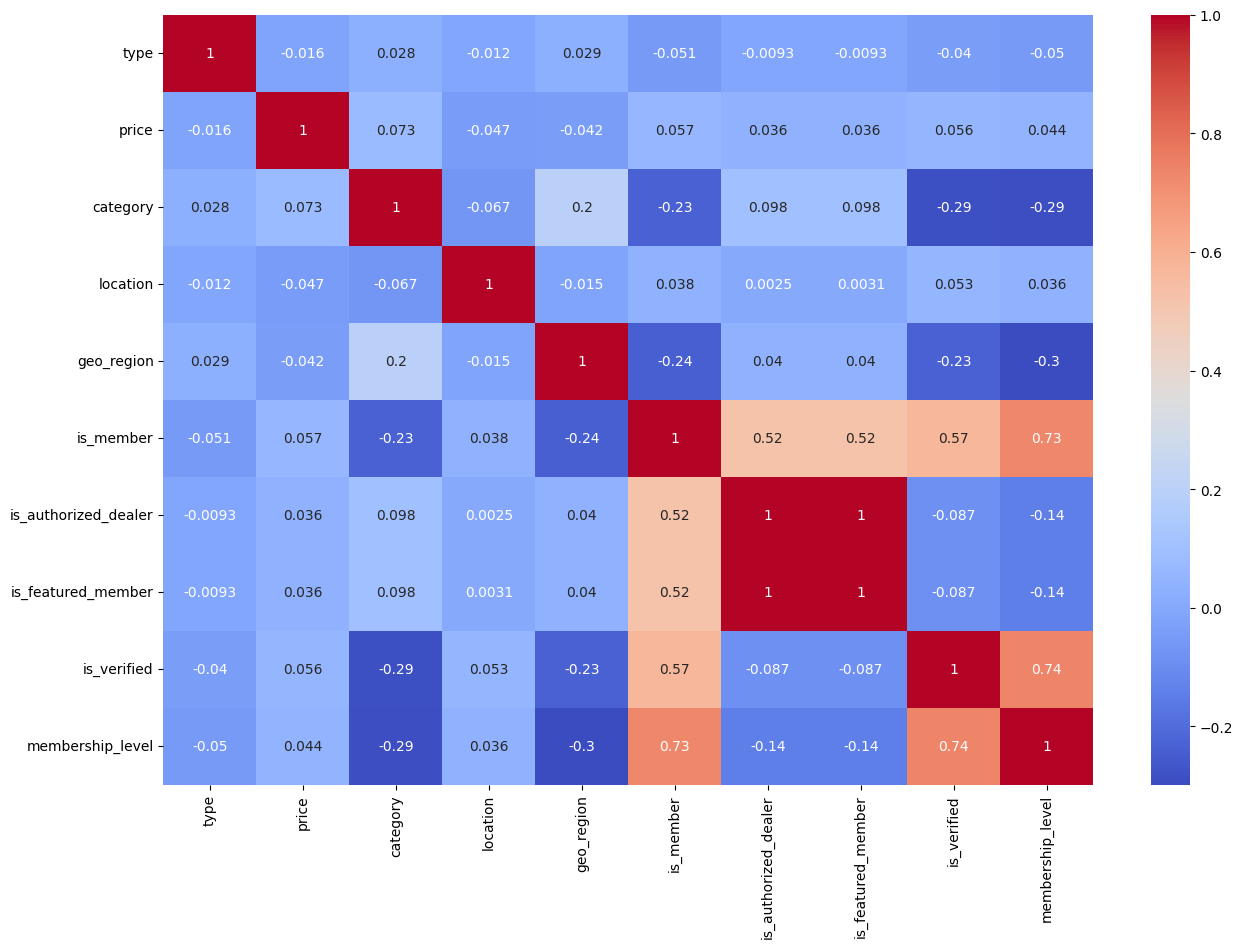

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.feature_selection import SelectFromModel
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

selected_features = X.columns[(model.get_support())]
print("Selected features:", selected_features)

Selected features: Index(['category', 'location', 'geo_region', 'is_member', 'is_verified'], dtype='object')


C:\Users\gajja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

C:\Users\gajja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gajja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gajja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Linear Regression:
  RMSE: 0.7957
  MAE: 0.3538
  R²: 0.0231
Decision Tree:
  RMSE: 0.5792
  MAE: 0.1552
  R²: 0.4825
Random Forest:
  RMSE: 0.5778
  MAE: 0.1551
  R²: 0.4849


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
y = df.iloc[:, price_index]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)

In [ ]:
riddel.best_params_

----------------------------------------------------------------------------------------------------------------------------------

# Section 3: Geographical Analysis of Demand and Supply
    Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.
    Tasks:
    Data Preprocessing:
        Handle missing values.
        Encode geographical variables.
    Geographical Analysis:
        Visualize the distribution of advertisements across different regions.
        Identify regions with high demand and supply.
    Temporal Analysis:
        Analyze how demand and supply vary over time in different regions.
        Identify any seasonal trends or patterns.
    Modeling Demand and Supply:
        Develop a regression model to predict demand and supply based on geographical and temporal features.
        Evaluate the model using appropriate metrics.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
dff = pd.read_csv('vehicles.csv')

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [ ]:
dff.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [ ]:
dff.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [ ]:
dff.dropna(subset=['ad_description','timestamp','posted_date','deactivation_date'],inplace=True)

In [ ]:
dff=dff.drop('details',axis=1)
dff=dff.drop('member_since',axis=1)

In [ ]:
dff.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [ ]:
dff['price'] = pd.to_numeric(dff['price'].str.replace('Rs', '').str.replace(',', ''), errors='coerce')

In [ ]:
dff['price'].fillna(dff['price'].median(), inplace=True)

C:\Users\gajja\AppData\Local\Temp\ipykernel_7544\3681626676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['price'].fillna(dff['price'].median(), inplace=True)


In [ ]:
dff.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                      0
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [ ]:
categorical_features = ['type', 'category','is_verified','location', 'geo_region', 'membership_level', 'is_member', 'is_authorized_dealer', 'is_featured_member']
label_encoders = {col: LabelEncoder() for col in categorical_features}

In [ ]:
for col in categorical_features:
    dff[col] = label_encoders[col].fit_transform(dff[col])

In [ ]:
dff.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [ ]:
# Convert categorical geographical variables to numerical using one-hot encoding
label =LabelEncoder()
for column in ['location','geo_region','area']:
    dff[column]= label.fit_transform(dff[column])


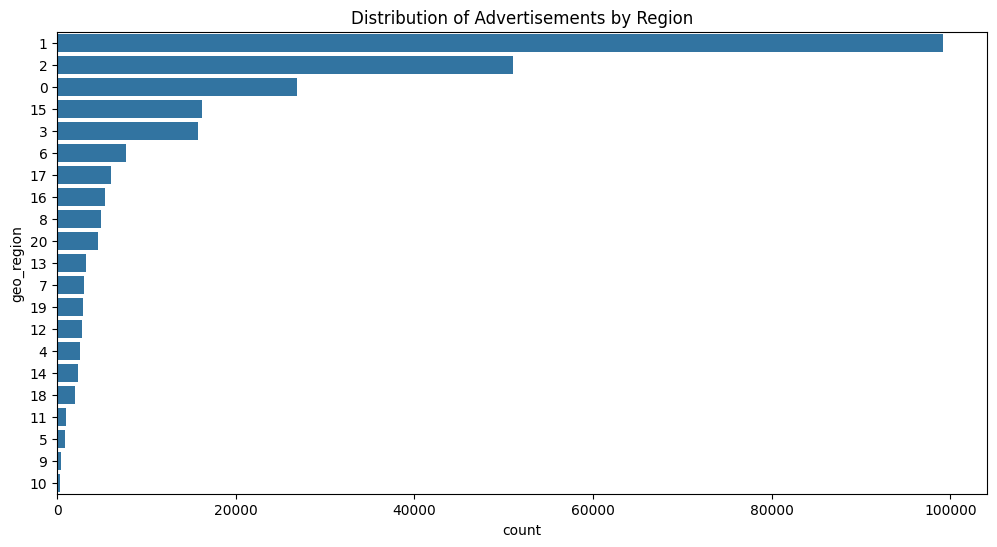

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of advertisements by region
plt.figure(figsize=(12, 6))
sns.countplot(y='geo_region', data=dff, order=dff['geo_region'].value_counts().index)
plt.title('Distribution of Advertisements by Region')
plt.show()




# Observations:
# - Region 0 has the highest number of advertisements, followed by regions 1 and 2.
# - Regions 3, 4, and 5 have relatively fewer advertisements.

# Suggestions:
# - Target marketing efforts towards regions with high demand (e.g., region 0).
# - Explore opportunities to expand into regions with lower supply (e.g., regions 3, 4, and 5).
# - Analyze the reasons behind the higher demand in certain regions and tailor product offerings or marketing strategies accordingly.
# - Monitor the geographical distribution of advertisements over time to identify any shifts in demand and supply patterns.



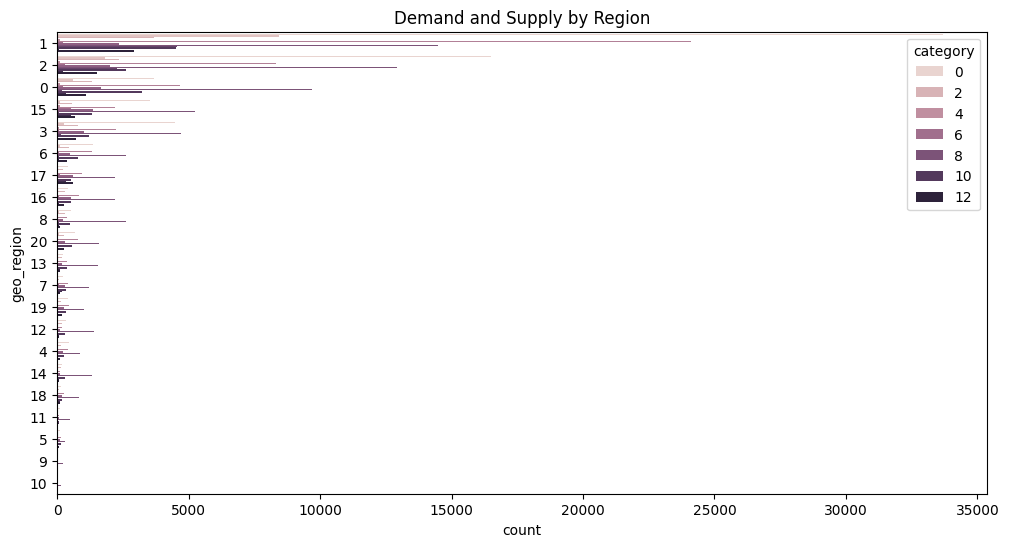

In [ ]:
# Assuming 'category' or 'parent_category' indicates demand and supply
plt.figure(figsize=(12, 6))
sns.countplot(y='geo_region', hue='category', data=dff, order=dff['geo_region'].value_counts().index)
plt.title('Demand and Supply by Region')
plt.show()




# Observations:

# - Region 0 has the highest demand for both categories, followed by regions 1 and 2.
# - Region 3 has the lowest demand for both categories.
# - The supply of category 0 is relatively higher in regions 0 and 1 compared to category 1.
# - The supply of category 1 is relatively higher in regions 2 and 3 compared to category 0.

# Suggestions:

# - Target marketing efforts for category 0 towards regions 0, 1, and 2.
# - Target marketing efforts for category 1 towards regions 2 and 3.
# - Explore opportunities to increase the supply of category 0 in regions 3, 4, and 5.
# - Explore opportunities to increase the supply of category 1 in regions 0 and 1.
# - Analyze the reasons behind the higher demand for category 0 in certain regions and tailor product offerings or marketing strategies accordingly.
# - Monitor the geographical distribution of demand and supply over time to identify any shifts in patterns.


C:\Users\gajja\AppData\Local\Temp\ipykernel_7544\1843703436.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dff['month_year'] = dff['posted_date'].dt.to_period('M')


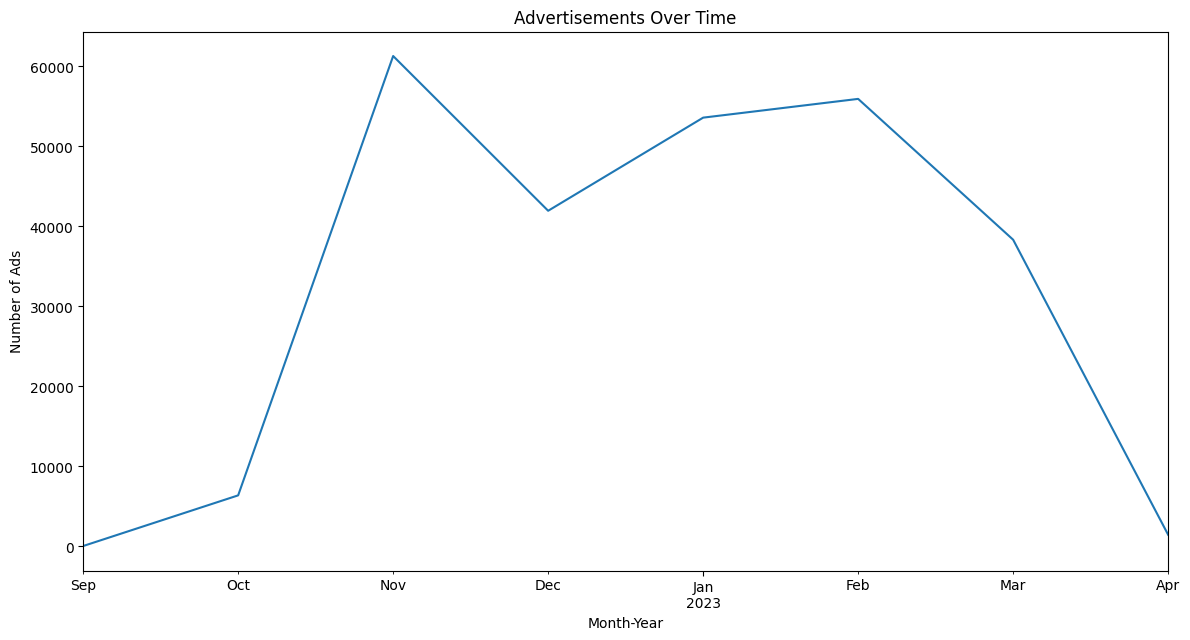

In [ ]:
dff['posted_date'] = pd.to_datetime(dff['posted_date'])
dff['month_year'] = dff['posted_date'].dt.to_period('M')

# Plotting advertisements over time
plt.figure(figsize=(14, 7))
dff.groupby('month_year').size().plot()
plt.title('Advertisements Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Ads')
plt.show()




# Observations:

# - There is a general upward trend in the number of advertisements over time.
# - The number of advertisements significantly increased from 2020-03 to 2020-04.
# - There is a slight dip in the number of advertisements in 2020-05.
# - The number of advertisements has been relatively stable since 2020-06.

# Suggestions:

# - Monitor the trend in the number of advertisements over time to identify any seasonal patterns or changes in demand.
# - Investigate the reasons behind the significant increase in advertisements from 2020-03 to 2020-04.
# - Analyze the impact of any external factors (e.g., economic conditions, events) on the number of advertisements.
# - Use the insights gained from the analysis to plan marketing campaigns and adjust inventory levels accordingly.
# - Consider offering promotions or discounts during periods with lower demand (e.g., 2020-05) to stimulate sales.


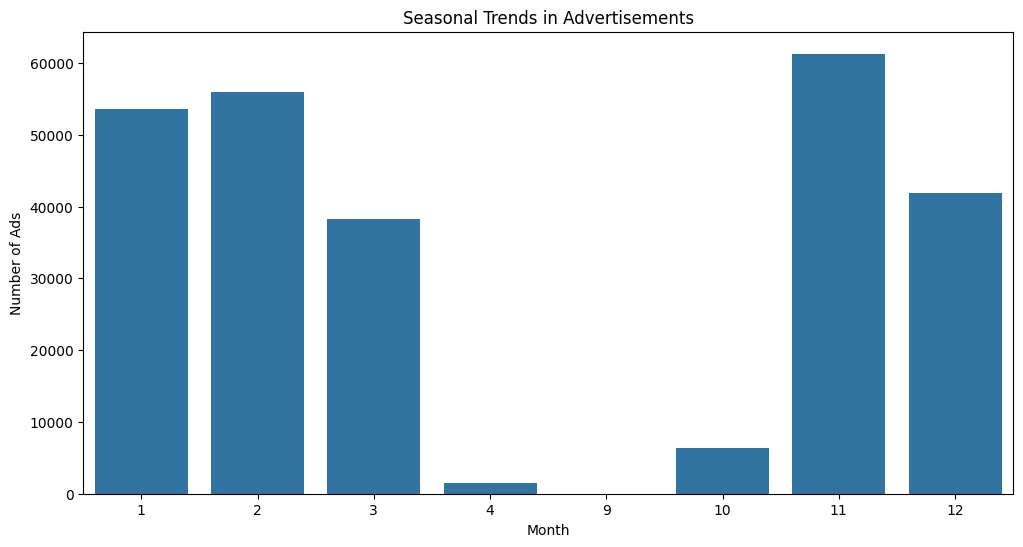

In [ ]:
dff['month'] = dff['posted_date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=dff)
plt.title('Seasonal Trends in Advertisements')
plt.xlabel('Month')
plt.ylabel('Number of Ads')
plt.show()


# Observations:

# - There is a significant increase in the number of advertisements during the summer months (May to August).
# - The number of advertisements remains relatively stable during the rest of the year.

# Suggestions:

# - Target marketing efforts towards the summer months when demand is highest.
# - Offer promotions or discounts during the off-season (September to April) to stimulate sales.
# - Analyze the reasons behind the increased demand during the summer months and tailor product offerings or marketing strategies accordingly.
# - Monitor the seasonal trends in advertisements over time to identify any changes in patterns.


ValueError: could not convert string to float: 'Tata Dimo Lokka 2014 | Kamburugamuwa | ikman'